### HELLENIC OPEN UNIVERSITY - SCHOOL OF SCIENCE AND TECHNOLOGY
### DATA SCIENCE AND MACHINE LEARNING : DAMA61 ACAD. YEAR 2024-25

#### <center> WRITTEN ASSIGNMENT 2 - SOLUTIONS </center>

In [1]:
# increase the width of the notebook
from IPython.display import display, HTML, Markdown

display(HTML("<style>.container { width:90% !important; }</style>"))

### Problem 1

We are going to use different variants of regressors to model a sinusoidal function. Use the following code to create a set of non-linear data:

In [2]:
import numpy as np
np.random.seed(42)
m = 1000
X = 5 * np.random.rand(m, 1) - 2.5
y = np.sin(X)*100 + np.random.randn(m, 1)

1) Apply standardization to the data and plot the learning curve for Linear Regression. <b>[20%]</b><br>
2) Transform the data into a polynomial of degree 50, apply standardization and plot the learning curve. <b>[20%]</b><br>
3) Repeat the process for a Regularized Linear Regression model using Ridge Regression with alpha=0.001 and comment on the differences between the three plots. <b>[10%]</b><br>
4) Apply 10-fold cross-validation for the simple Linear Regression model and calculate the mean RMSE and its standard deviation. <b>[10%]</b><br>
5) Apply 10-fold cross-validation for the polynomial model without regularization and calculate the mean RMSE. <b>[10%]</b><br>
6) Apply 10-fold cross-validation for the regularized model and calculate the mean RMSE. <b>[10%]</b><br>
7) Comment on your results in the queries 4, 5, and 6. <b>[20%]</b><br>

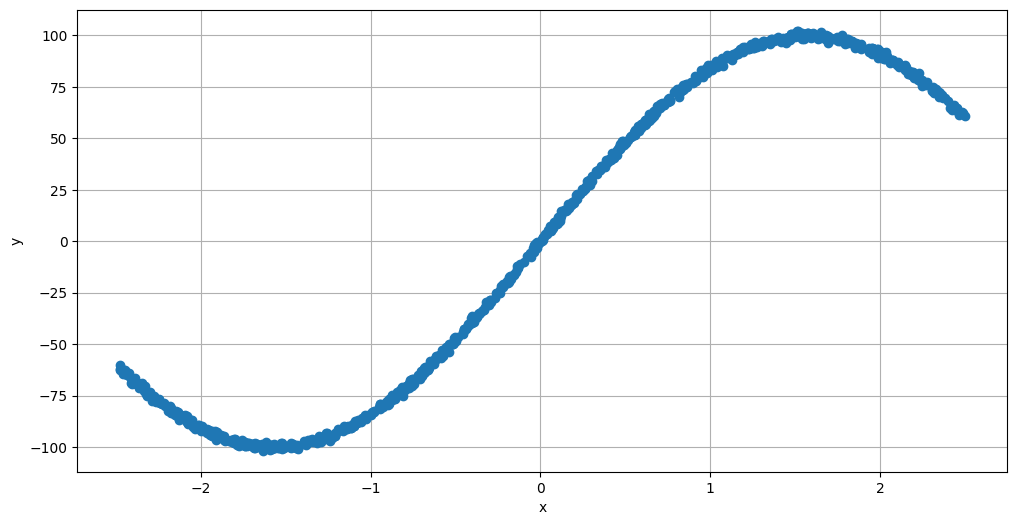

In [3]:
# Visualize the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,6))
plt.plot(X, y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [4]:
# 1. Apply standardization to the data and plot the learning curve for Linear Regression.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create all pipeline components
std_scaler = StandardScaler()
lin_reg = LinearRegression()

simple_regression = make_pipeline(std_scaler, lin_reg)

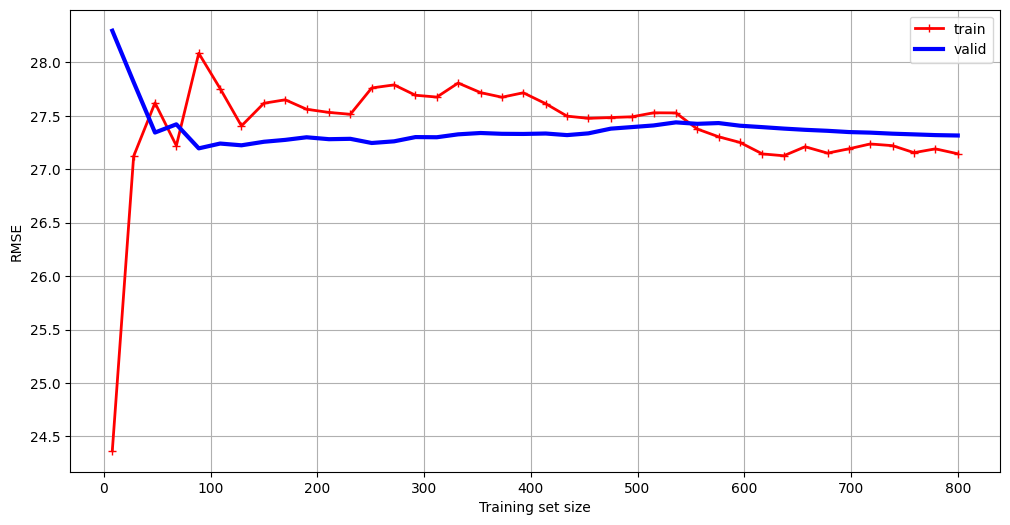

In [5]:
# Plot the learning curve for the simple linear model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(simple_regression,
                                                         X, y,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [6]:
# 2. Transform the data into a polynomial of degree 50, apply standardization and plot the learning curve.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=50, include_bias=False)

# Create the three pipelines that we'll be using for the learning curves and cross-validation
polynomial_regression = make_pipeline(poly_features, std_scaler, lin_reg)

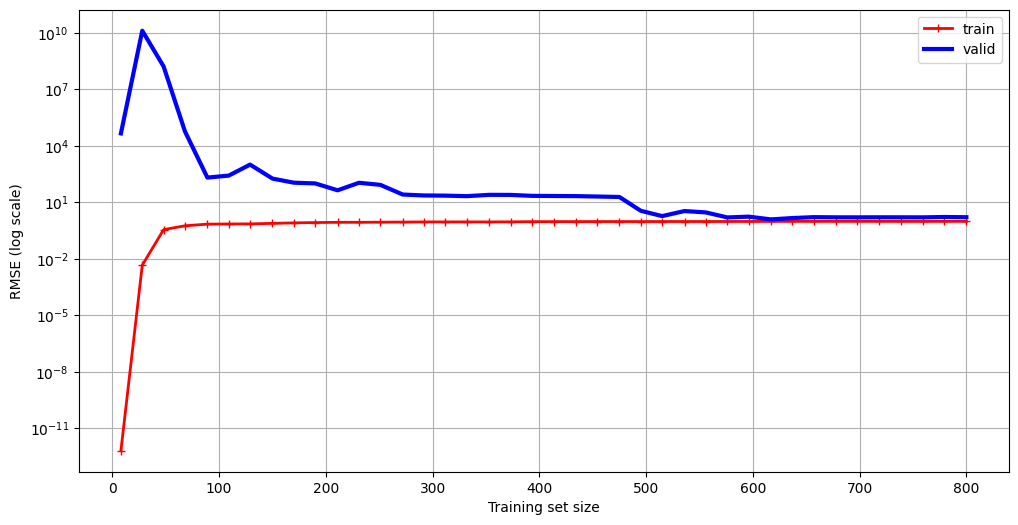

In [7]:
# Plot the learning curve for the unregularized polynomial model

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression,
                                                         X, y,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE (log scale)")
plt.grid()
plt.legend(loc="upper right")
plt.yscale("log")
plt.show()

In [8]:
# 3. Repeat the process for a Regularized Linear Regression model using Ridge Regression with alpha=0.001 and comment on the differences between the three plots.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.001)
polynomial_ridge_regression = make_pipeline(poly_features, std_scaler, ridge_reg)

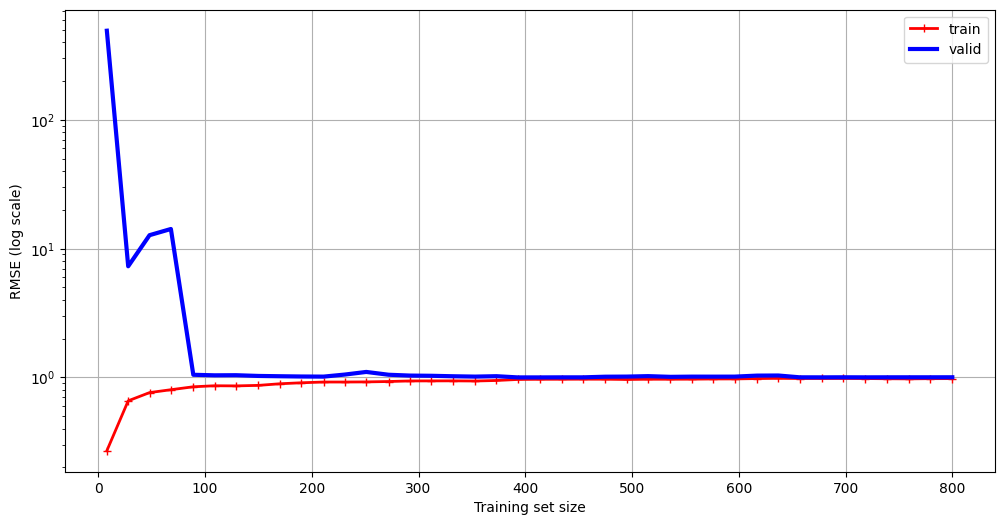

In [9]:
# Plot the learning curve for the regularized polynomial model
train_sizes, train_scores, valid_scores = learning_curve(polynomial_ridge_regression,
                                                         X, y,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE (log scale)")
plt.grid()
plt.legend(loc="upper right")
plt.yscale("log")
plt.show()

#### Comments:

Of the three, the unregularized polynomial model clearly shows signs of overfitting based on the difference between the training error and the validation error as the training set size approaches 100%. It could benefit from regularization.

Indeed, the regularized polynomial model seems to converge better, and also seems to achieve a better RMSE score than the linear model, implying that the latter could be underfitting.

In [10]:
# 4. Apply 10-fold cross-validation for the simple Linear Regression model and calculate the mean RMSE and its standard deviation.
from sklearn.model_selection import cross_val_score

#Cross-val for the simple linear regression model
metric = cross_val_score(simple_regression,
                         X, y,
                         cv = 10,
                         scoring = "neg_root_mean_squared_error")

print("Linear Regressio:")
print(f"Test set RMSE: {-metric.mean():.2f}")

Linear Regressio:
Test set RMSE: 27.24


In [11]:
# 5. Apply 10-fold cross-validation for the polynomial model without regularization and calculate the mean RMSE.
metric = cross_val_score(polynomial_regression,
                         X, y,
                         cv = 10,
                         scoring = "neg_root_mean_squared_error")

print("Polynomial Regression w/o Regularization:")
print(f"Test set RMSE: {-metric.mean():.2f}")

Polynomial Regression w/o Regularization:
Test set RMSE: 1.45


In [12]:
# 6. Apply 10-fold cross-validation for the regularized model and calculate the mean RMSE.
metric = cross_val_score(polynomial_ridge_regression,
                         X, y,
                         cv = 10,
                         scoring = "neg_root_mean_squared_error")

print("Polynomial Regression with Regularization:")
print(f"Test set RMSE: {-metric.mean():.2f}")

Polynomial Regression with Regularization:
Test set RMSE: 0.99


In [13]:
# 7. Comment on your results in the queries 4, 5, and 6.

#### Comments:
Cross-validation seems to confirm the findings of the learning curves: The polynomial model benefits from regularization, implying its tendency to overfit. The regularized polynomial model seems to perform best at cross-validation.

<hr>

### Problem 2

Apply linear and RBF SVMs on the Breast Cancer dataset.

1) Download the Breast Cancer dataset from the <code>sklearn.datasets</code> package. <b>[5%]</b><br>
2) Out of the 30 available features, select only "Worst area" and "Mean Concave Points". <b>[5%]</b><br>
3) Visualize the data from the Positive and Negative class with the "Mean Concave Points" on the x-axis and "Worst Area" on the y-axis. <b>[10%]</b><br>
4) Train two linear SVM classifiers with the regularization hyperparameter C equal to 0.1 and 1000, respectively. *Don't forget data standardization.* <b>[20%]</b><br>
5) Plot the data points, the decision boundaries and the margins for the two classifiers. <b>[10%]</b><br>
6) Display the number of Support Vectors and the F1-score for each of the two classifiers. <b>[10%]</b><br>
7) Run a Grid Search for an RBF SVM, with the following hyperparameter options:<br> **C:** [0.1, 1, 10, 100] , **gamma:** [0.1, 1, 10, 100] <b>[20%]</b><br>
8) Display the best hyperparameter values, the number of support vectors, and the F1-score for the best model. <b>[10%]</b><br>
9) Plot the data points and the decision boundary for the best RBF model. <b>[10%]</b><br>

In [14]:
# 1. Download the Breast Cancer dataset from the sklearn.datasets package.
from sklearn import datasets
bc_dataset = datasets.load_breast_cancer()

# Convert the data to a pandas data frame for better manipulation
import pandas as pd
bc_df = pd.DataFrame(bc_dataset['data'], columns=bc_dataset['feature_names'])
bc_df['target'] = pd.Series(bc_dataset['target'])

In [15]:
# Visualize the first rows of the data
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
# Get a description of the data
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# 2. Out of the 30 available features, select only "Worst area" and "Mean Concave Points"
X = bc_df[['mean concave points', 'worst area']]
y = bc_df['target']

display(X)

print("Target values")
display(y)

,mean concave points,worst area
0,0.14710,2019.0
1,0.07017,1956.0
2,0.12790,1709.0
3,0.10520,567.7
4,0.10430,1575.0
...,...,...
564,0.13890,2027.0
565,0.09791,1731.0
566,0.05302,1124.0
567,0.15200,1821.0


Target values


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

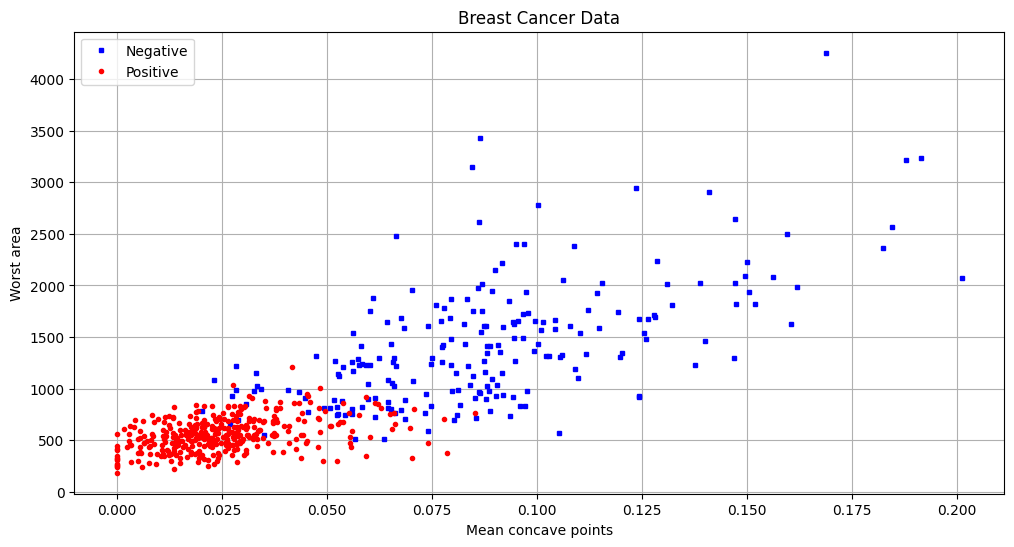

In [18]:
# 3. Visualize the data from the Positive and Negative class 
# with the "Mean Concave Points" on the x-axis and "Worst Area" on the y-axis.

plt.figure(figsize=(12, 6))
plt.title("Breast Cancer Data")
plt.plot(X['mean concave points'].loc[y == 0], X['worst area'].loc[y == 0], "bs", ms=3, label="Negative")
plt.plot(X['mean concave points'].loc[y == 1], X['worst area'].loc[y == 1], "ro", ms=3, label="Positive")
plt.grid()
plt.xlabel('Mean concave points')
plt.ylabel('Worst area')
plt.legend(loc="upper left")
plt.show()

In [19]:
# 4. Train two linear SVM classifiers with the regularization hyperparameter C equal to 0.1 and 1000, respectively.
# Don't forget data standardization.
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

standard_scaler = StandardScaler()

svm_clf1 = SVC(C = 0.1, kernel = 'linear', random_state = 42)
linear1 = make_pipeline(standard_scaler, svm_clf1)
linear1.fit(X, y)

svm_clf2 = SVC(C = 1000, kernel = 'linear', random_state = 42)
linear2 = make_pipeline(standard_scaler, svm_clf2)
linear2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, kernel='linear', random_state=42))])

In [20]:
# 5. Plot the data points, the decision boundaries and the margins for the two classifiers.

# We must scale the data out of the pipeline to visualise them correclty.
X_scaled = standard_scaler.transform(X)

def plot_svc_decision_boundary(ax, svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    ax.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    ax.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    ax.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

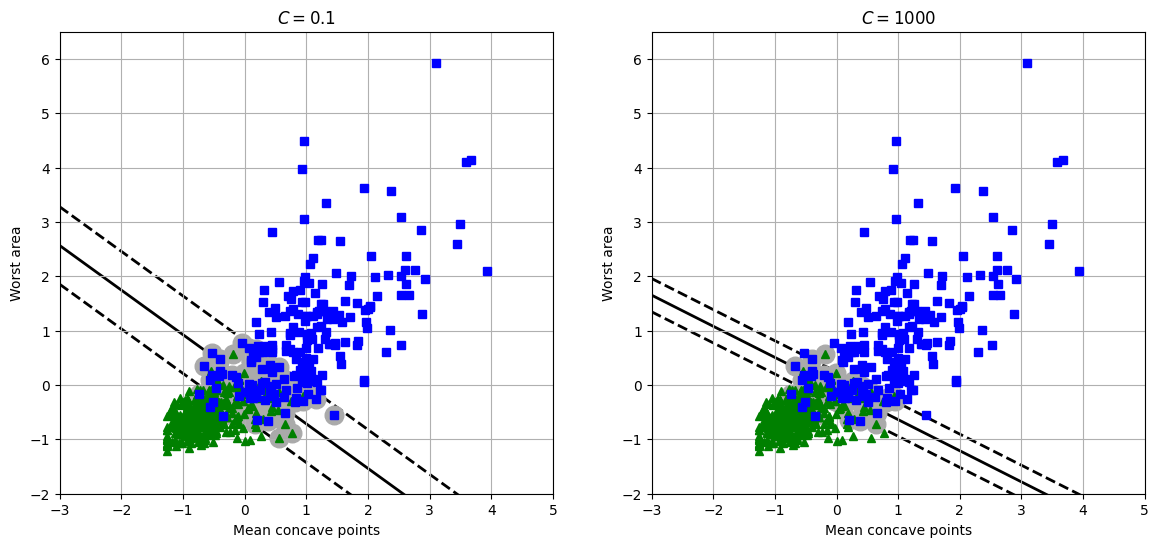

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
ax[0].set_title(f"$C = {svm_clf1.C}$")
ax[0].plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "g^")
ax[0].plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "bs")
plot_svc_decision_boundary(ax[0], svm_clf1, -3, 5)
ax[0].set_xlabel('Mean concave points')
ax[0].set_ylabel('Worst area')
ax[0].axis([-3, 5, -2, 6.5])
ax[0].grid()

ax[1].set_title(f"$C = {svm_clf2.C}$")
ax[1].plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "g^")
ax[1].plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "bs")
plot_svc_decision_boundary(ax[1], svm_clf2, -3, 5)
ax[1].set_xlabel('Mean concave points')
ax[1].set_ylabel('Worst area')

ax[1].axis([-3, 5, -2, 6.5])
ax[1].grid()

In [22]:
# 6. Display the number of Support Vectors and the F1-score for each of the two classifiers.

from sklearn.metrics import f1_score

print(f"Linear SVM with C={svm_clf1.C}")
print(f"F1: {f1_score(linear1.predict(X), y):.2f}")
print(f"Support Vectors: {linear1['svc'].support_vectors_.shape[0]}")
print()
print(f"Linear SVM with C={svm_clf2.C}")
print(f"F1: {f1_score(linear2.predict(X), y):.2f}")
print(f"Support Vectors: {linear2['svc'].support_vectors_.shape[0]}")

Linear SVM with C=0.1
F1: 0.94
Support Vectors: 129

Linear SVM with C=1000
F1: 0.95
Support Vectors: 85


In [23]:
# 7. Run a Grid Search for an RBF SVM, with the following hyperparameter options: C:[0.1, 1, 10, 100], gamma: [0.1, 1, 10, 100]
            
from sklearn.model_selection import GridSearchCV

svm_clf3 = SVC(kernel = 'rbf', random_state = 42)
rbf1 = make_pipeline(standard_scaler, svm_clf3)

parameters = {'svc__gamma':[0.1, 1, 10, 100], 'svc__C':[0.1, 1, 10, 100]}

rbf_svm = GridSearchCV(rbf1, parameters)
rbf_svm.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.1, 1, 10, 100]})

In [24]:
# 8. Display the best hyperparameter values, the number of support vectors, and the F1-score for the best model. <b>[10%]</b><br>

print("RBF SVM:")
print(f"Best Gamma: {rbf_svm.best_estimator_.get_params()['svc__gamma']}")
print(f"Best C: {rbf_svm.best_estimator_.get_params()['svc__C']}")
print(f"F1: {f1_score(rbf_svm.best_estimator_.predict(X), y):.2f}")
print(f"Support Vectors: {rbf_svm.best_estimator_['svc'].support_vectors_.shape[0]}")

RBF SVM:
Best Gamma: 10
Best C: 1
F1: 0.96
Support Vectors: 197


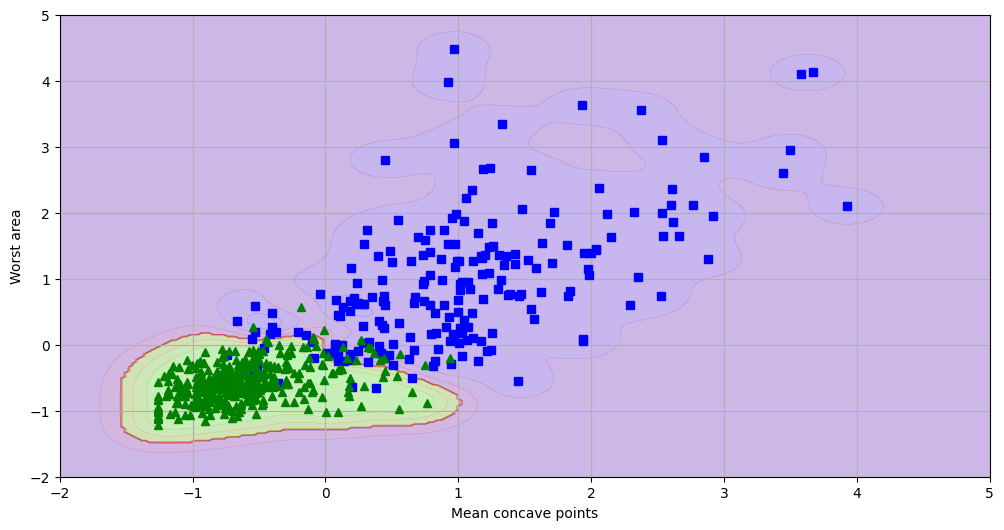

In [25]:
# 9. Plot the data points and the decision boundary for the best RBF model.
def plot_dataset(X, y, axes, labels):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(labels['x'])
    plt.ylabel(labels['y'])

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 250)
    x1s = np.linspace(axes[2], axes[3], 250)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

bounding_box = [-2, 5, -2, 5]
axes_labels = {'x': 'Mean concave points', 'y': 'Worst area'}

fig = plt.figure( figsize = (12, 6))
plot_predictions(rbf_svm.best_estimator_['svc'], bounding_box)
plot_dataset(X_scaled, y, bounding_box, axes_labels)
plt.show()